Dans cette partie , il est question de faire le preprocessing de l'image en question les operations de segmentation , de traitement seront appliquees a l'image pour sortir l'image qui sera analyser a l'aide du OCR pour l'extraction des informations 

# type d'image

pour notre cas on choisit les cartes nationales d'identité pour ce format d'image 
le pipeline certificate est le plus adapté (voir fig 4)

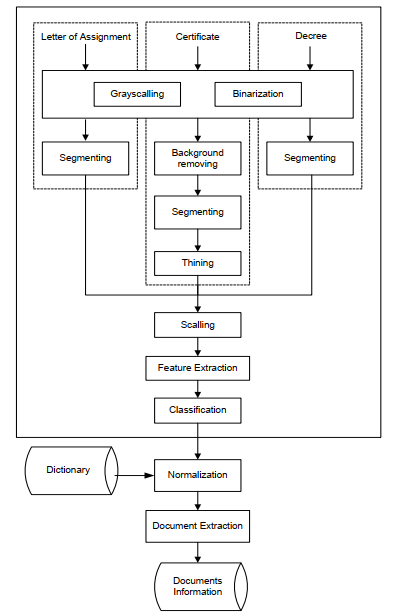

In [1]:
from PIL import Image # Import de la classe Image
pipeline = Image.open('pipeline.png') # ouverture du fichier
pipeline

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
img = cv2.imread("kanam.jpeg")

In [4]:
#for resizing the image with given paramet
def resize(img, heightImg, widthImg):
    cv2.resize(img, (widthImg, heightImg))
    return img   

## grayscalling de l'image

In [5]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## binarisation

binarisation en utilisant le simple threesholding

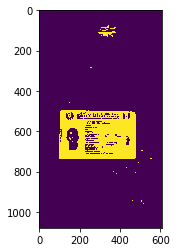

In [20]:
imgThres = cv2.threshold(imgGray,155,255,cv2.THRESH_BINARY)
plt.imshow(imgThres[1])

binarisation en utilisant la methode otsu

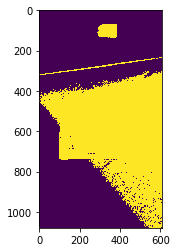

In [13]:
imgOtsu = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(imgOtsu[1])

## background removing 

## segmenting edge detection

gaussaian blur 

to reduce noise and detail

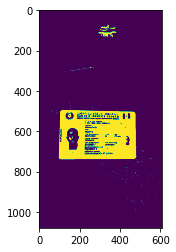

In [22]:
imgBlur = cv2.GaussianBlur(imgThres[1], (5, 5), 1)
plt.imshow(imgBlur)

using Canny edge detector now


In [23]:
imgThreshold = cv2.Canny(imgBlur, 200, 200)

apply now mathematic morphology 

In [24]:
kernel = np.ones((5, 5))
imgDial = cv2.dilate(imgThreshold, kernel, iterations=2)  # APPLY DILATION
imgThreshold = cv2.erode(imgDial, kernel, iterations=1)

find all contours now 

In [25]:
contours, hierarchy = cv2.findContours(
imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

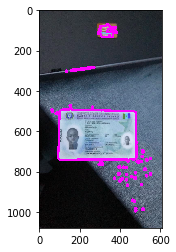

In [91]:
imgContours = img.copy() 
imgBiggestContour = img.copy()
# FIND ALL CONTOURS
allcontours = cv2.drawContours(imgContours, contours, -1, (255, 0, 255), 10)
plt.imshow(allcontours)

found biggest contours to get the id card area

In [92]:
def biggestContour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest,max_area

def reorder(myPoints):

    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)

    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] =myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] =myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]
    return myPointsNew

In [95]:
biggest , max_area = biggestContour(contours)
biggest = reorder(biggest)

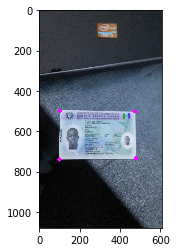

In [96]:
bigContours = cv2.drawContours(imgBiggestContour, biggest, -1, (255, 0, 255), 20)
plt.imshow(bigContours)